In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


This project focuses on building a predictive model for a regression task using the **California housing dataset**, where the goal is to predict the median house value for California districts.
**we will use the Regression model and Rolynomial model**

In [2]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the Data
data = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [4]:
#Copying the data into "housing_df" variable, this method helps us keep the original data

housing_df = data

# **Explore The Data**

In [5]:
#check on our data {see the number of columns, rows and the data type of each column}
housing_df.info()#see the 5 rows from the data
housing_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
#check on our data {see the number of columns, rows and the data type of each column}
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#summary statistics
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In the preliminary exploration of our dataset using the describe() function, notable observations emerge, specifically, the discernible disparity between the mean and standard deviation values, along with the expansive range between the minimum and maximum values. These observations suggest a significant variability within the dataset, which could potentially be attributed to the presence of outliers. However, as we are currently engaged in the exploratory phase of our analysis, the handling of outliers will be deferred to a later stage in our analytical


In [8]:
#check if there's any null values in our data
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


**207** missing value in the **total_bedrooms** columns
where going fo fill them whith the **mean** value


In [9]:
#Handling missing value
housing_df['total_bedrooms']=housing_df['total_bedrooms'].fillna(round(housing_df['total_bedrooms'].mean()))
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

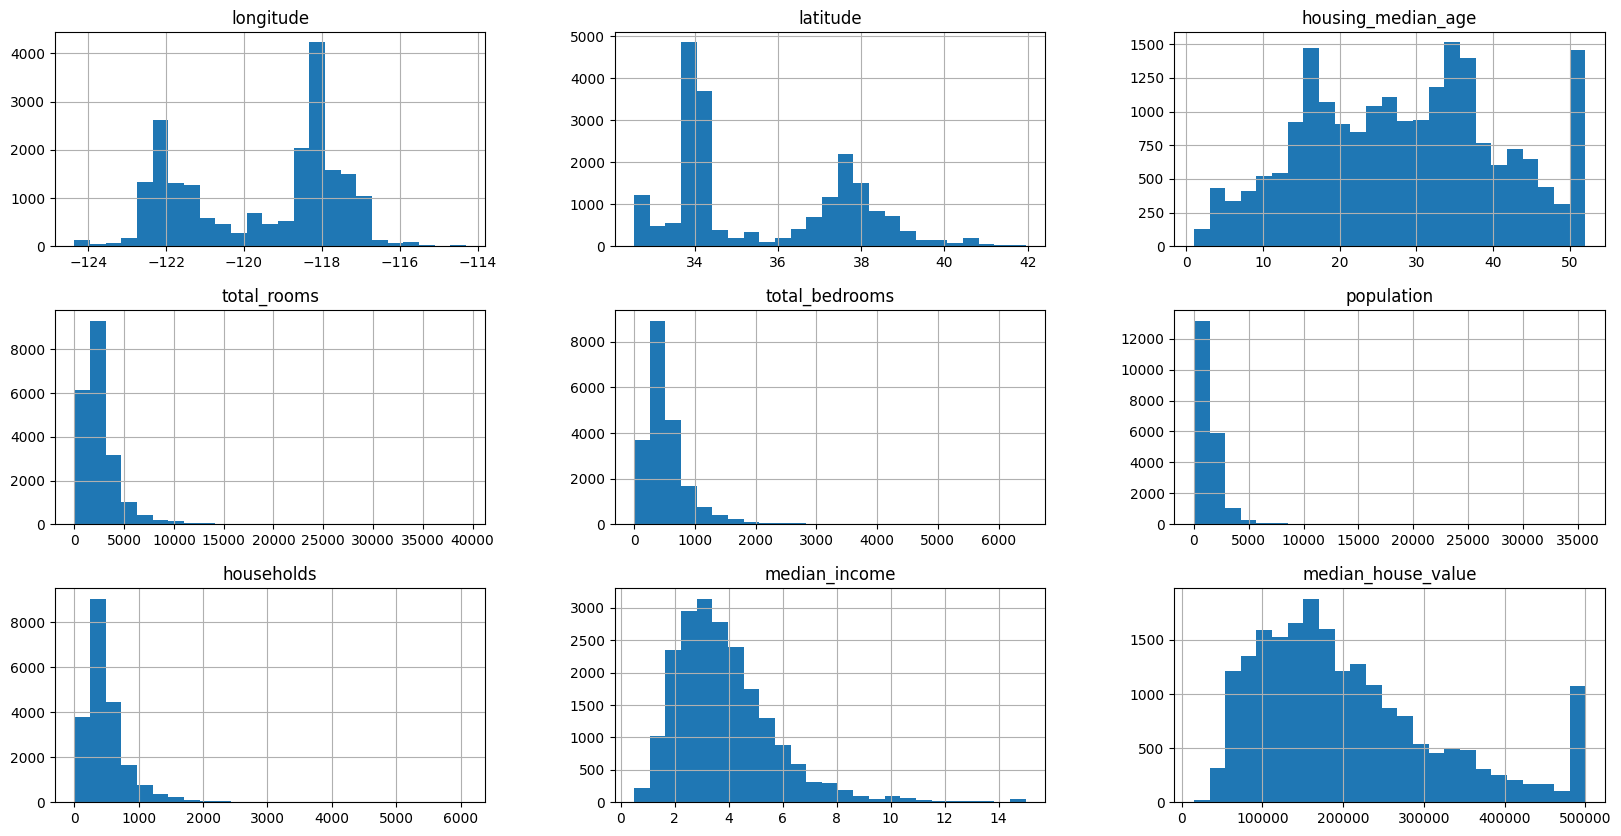

In [10]:
# Histogram for all numerical columns
housing_df.hist(bins=25,figsize=(20,10));

In [11]:
#explor the corelation between columns
housing_df.select_dtypes(exclude="object").corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066659,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066659,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


<Axes: >

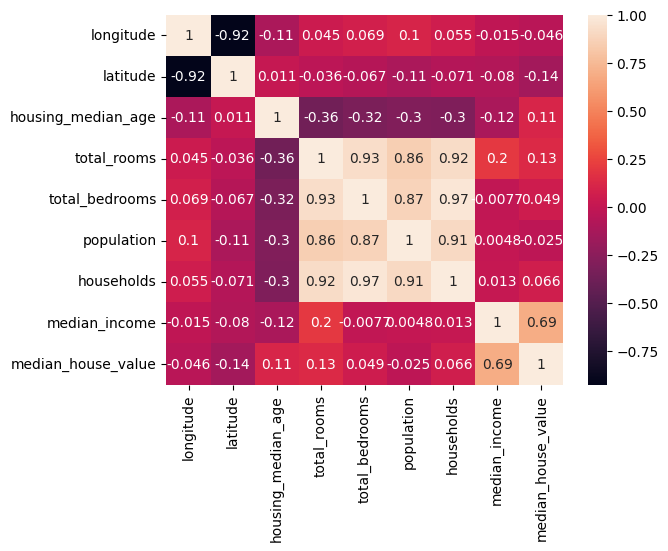

In [12]:
# Create the correlation matrix
correlation_matrix = housing_df.select_dtypes(exclude="object").corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True)

Visualize the distribution of the '**median_house_value**' column by binning the values into different ranges 

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


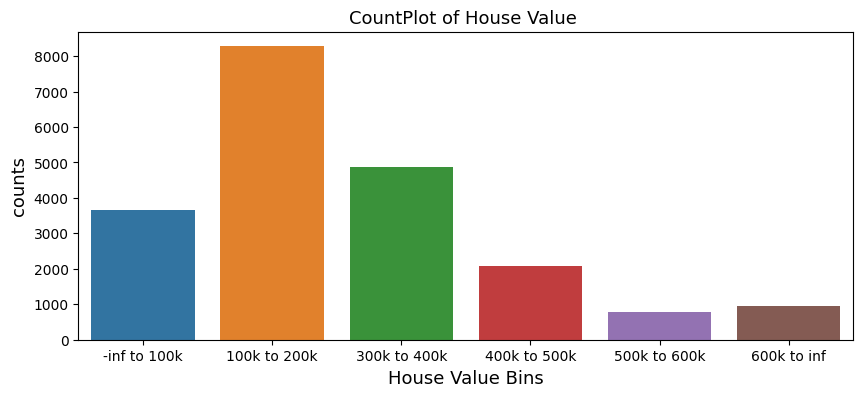

In [13]:
#MAX value is 500001
meadian_house_cv = pd.cut(x=housing_df['median_house_value'],
                          bins=(-np.inf, 100000,200000,300000,400000,500000,np.inf),
                          labels=('-inf to 100k', '100k to 200k', '300k to 400k', '400k to 500k', '500k to 600k', '600k to inf'))
## countpLot for the above chunks 
plt.figure(figsize=(10,4)) 
sns.countplot(x=meadian_house_cv) 
plt.title('CountPlot of House Value ', fontsize=13, c='k') 
plt.xlabel('House Value Bins', fontsize=13, c='k') 
plt.ylabel('counts', fontsize=13,c='k') 
plt.show() 

The predominant range for the median_house_value feature falls within the interval of 100,000 to 200,000.


In [14]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# **Boxplot for the all the columns to check the outliers


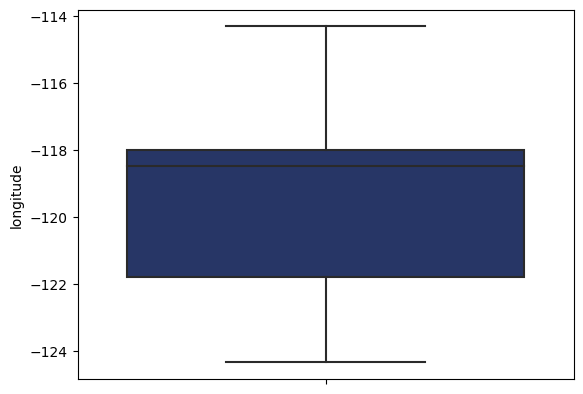

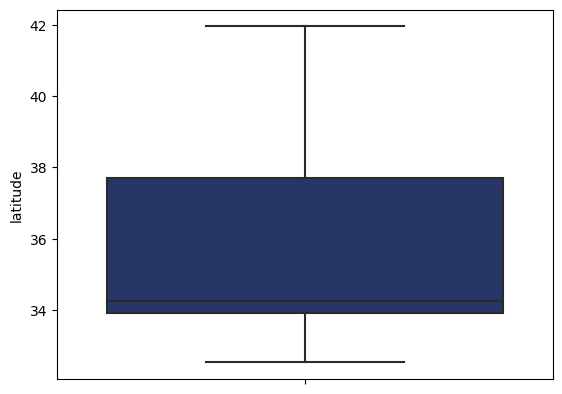

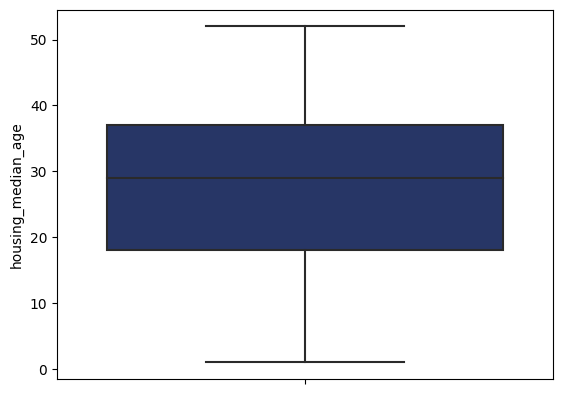

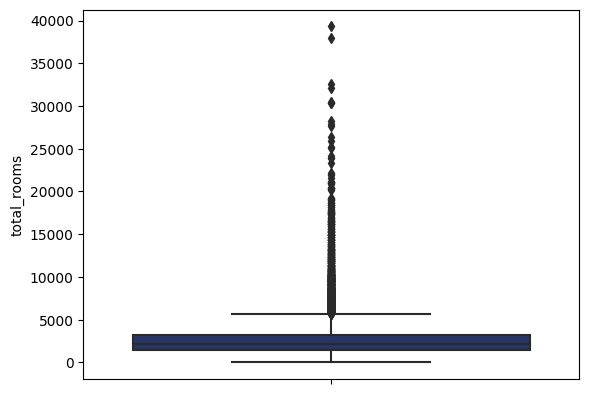

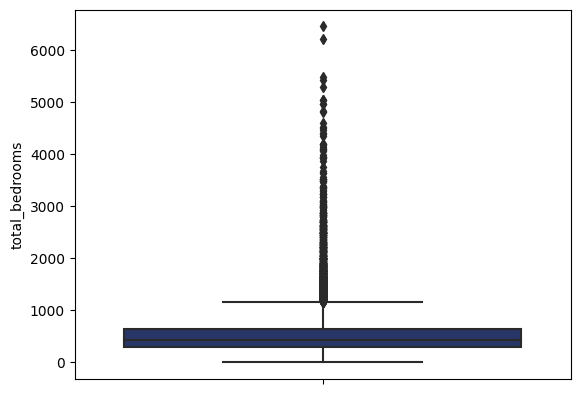

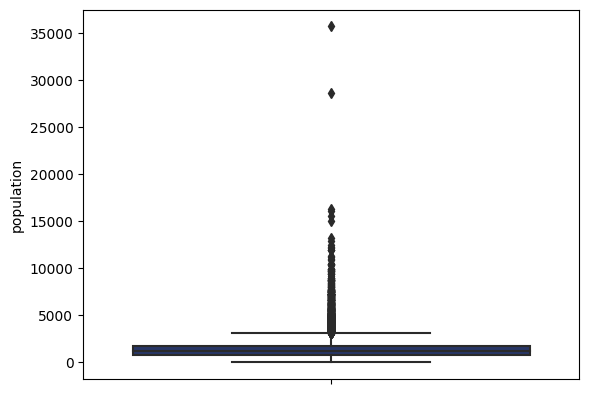

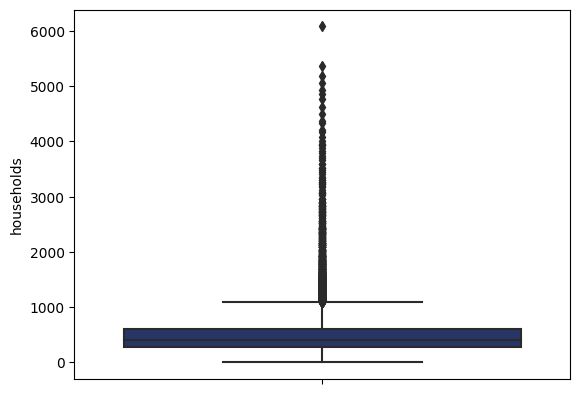

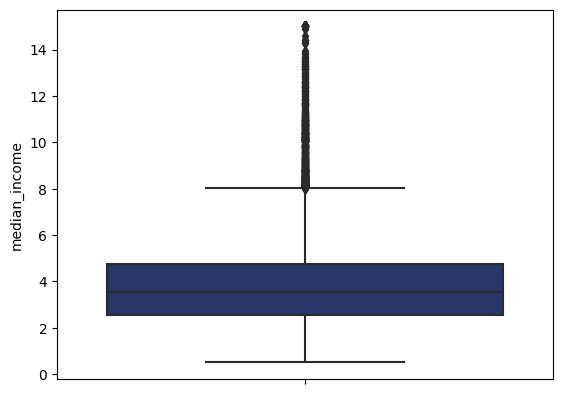

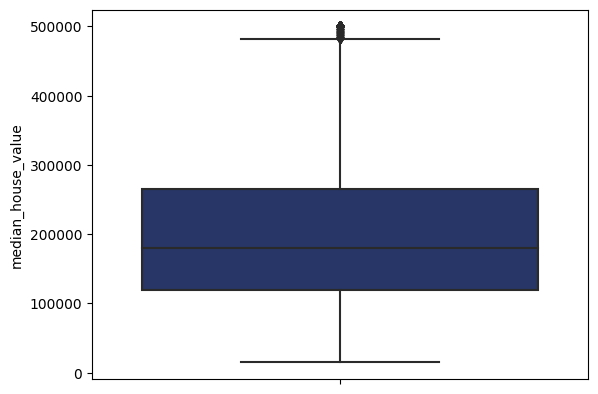

In [15]:
# Boxplot for the all the columns to check the outliers
columns_list = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
for i in columns_list:
  sns.boxplot(y=i,data=housing_df,color='#1D3070')
  plt.show()

From the boxplots generated earlier, it's evident that five columns contain outlier values. To further explore the relationship between these columns and the target column median_house_value, we will employ scatter plots. Each scatter plot will depict the relationship between a specific column and the target column. This visualization will aid in understanding how the outlier values in these columns relate to the target variable.

In [16]:
#Before checking the outliers in each column, lets try the normal method for deleting outliers
#Furst lets copy our data
df_copy = housing_df.copy()

# Method 1

In [17]:
df_copy1 = df_copy.copy()
from scipy import stats
delet_outliers = df_copy1[(np.abs(stats.zscore(df_copy1.iloc[:,:-1])) < 3).all(axis=1)]

In [18]:
print(df_copy1.shape)
print(delet_outliers.shape)

(20640, 10)
(19746, 10)


In [19]:
sum_deliting_outliers = np.product(delet_outliers.shape)
sum_original_data = np.product(df_copy1.shape)
percent_losing_data = round(100*(sum_original_data-sum_deliting_outliers)/sum_original_data,2)
print(f'the percentage of losing data is: {percent_losing_data}%')

the percentage of losing data is: 4.33%


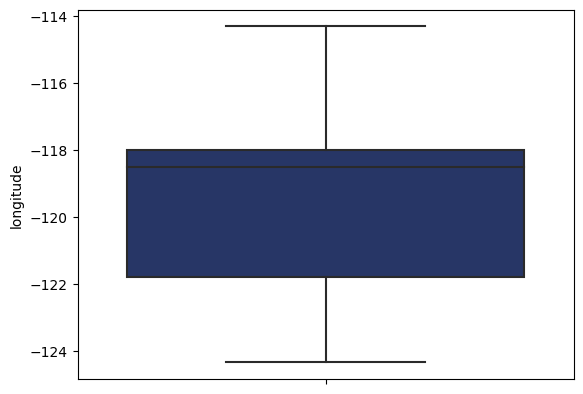

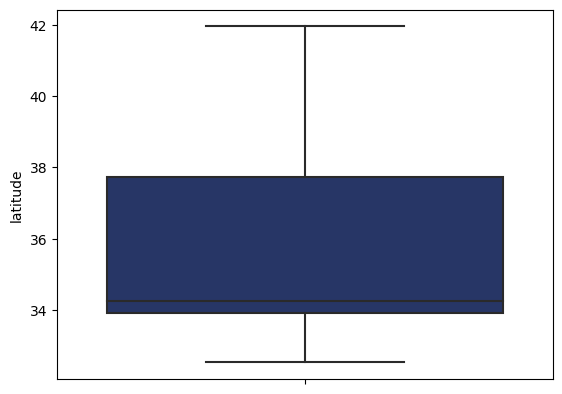

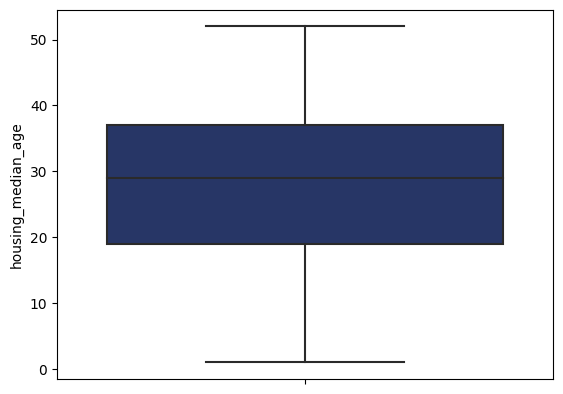

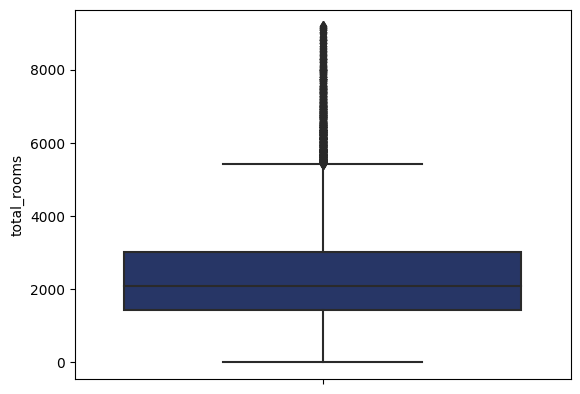

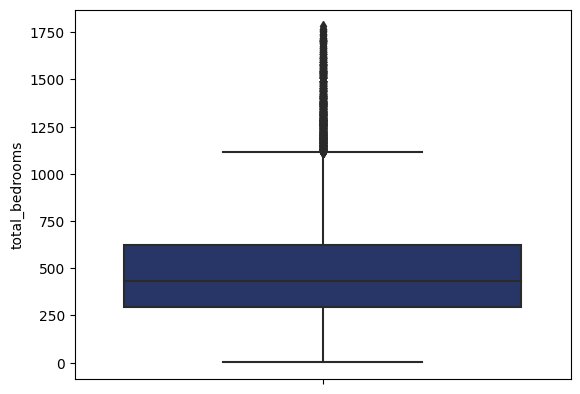

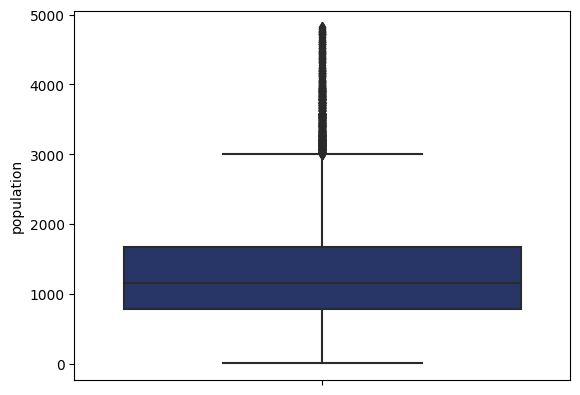

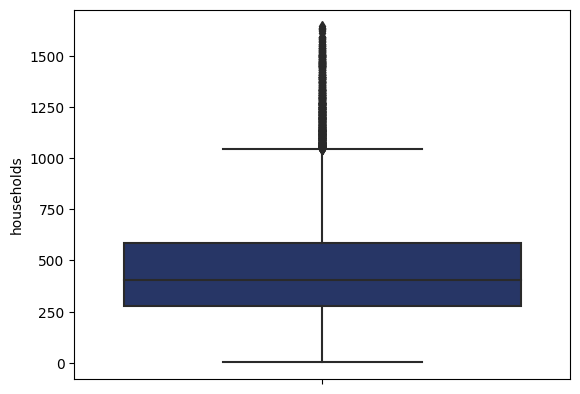

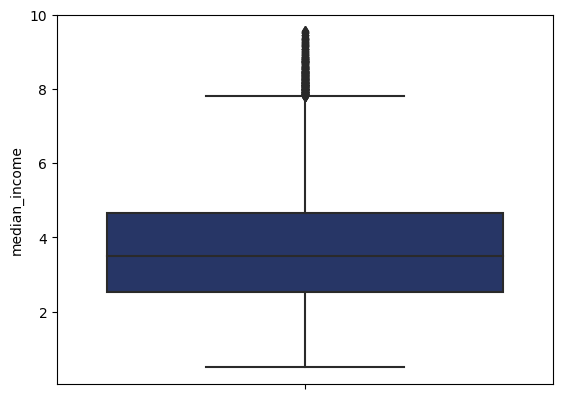

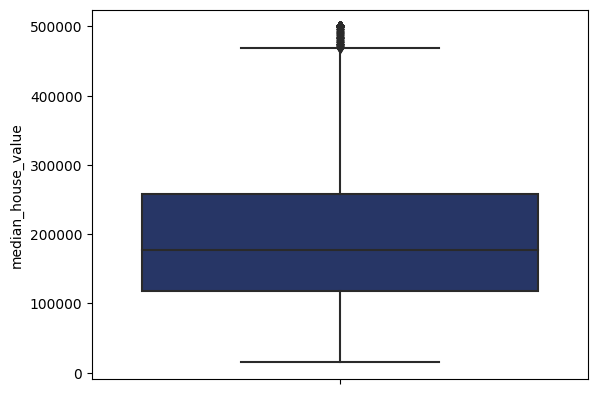

In [20]:
# Boxplot for the all the columns after deleting outliers to check again
columns_l = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
for j in columns_l:
  sns.boxplot(y=j,data=delet_outliers,color='#1D3070')
  plt.show()

so we lose 4.33% in our data that is not a big number but lets see if we can minimize that

# Method 2

In [21]:
#copy the data and tack only numerical features
df_copy2 = df_copy.iloc[:,:-1]
for i in df_copy2.columns:
  Q1 = df_copy2[i].quantile(0.25)
  Q3 = df_copy2[i].quantile(0.75)
  
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  filtered_data = df_copy2[(df_copy2[i] >= lower_bound) & (df_copy2[i] <= upper_bound)]
  
sum_deliting_outliers = np.product(filtered_data.shape)
sum_original_data = np.product(df_copy2.shape)
percent_losing_data = round(100*(sum_original_data-sum_deliting_outliers)/sum_original_data,2)
print(f'the percentage of losing data is: {percent_losing_data}%')
print(f"the shaoe of original data: {df_copy2.shape}")
print(f'the shape after deliting outliers: {filtered_data.shape}')

the percentage of losing data is: 5.19%
the shaoe of original data: (20640, 9)
the shape after deliting outliers: (19569, 9)


using the Interquartile Range (IQR) we lose 5.19% in our data

So lets try another method, we're going to work with each column that we mantion in the boxplot befor

In [22]:
#list of outliers that we notes in the boxplot
outlier_boxplot_list = ['total_rooms','total_bedrooms',
                        'population', 'households', 'median_income']

# Method 3

scatterplot for each column in outlier_boxplot_list than deliting the outliers from each column

# total_rooms
# 

<Axes: xlabel='total_rooms', ylabel='median_house_value'>

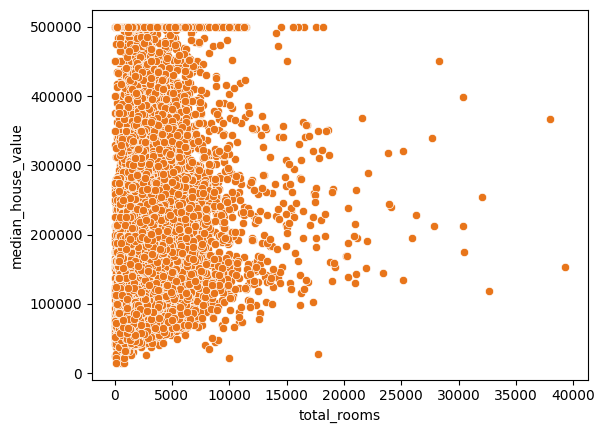

In [23]:
# scatterplot for the '"total_rooms"' with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="total_rooms",data=df_copy,color='#E8751A')

In [24]:
#based on the scatter plot, we can remove values higher than 30000 in the total_bedrooms column as outliers. 
df_copy = df_copy[df_copy["total_rooms"]<=30000]

# total_bedrooms

<Axes: xlabel='total_bedrooms', ylabel='median_house_value'>

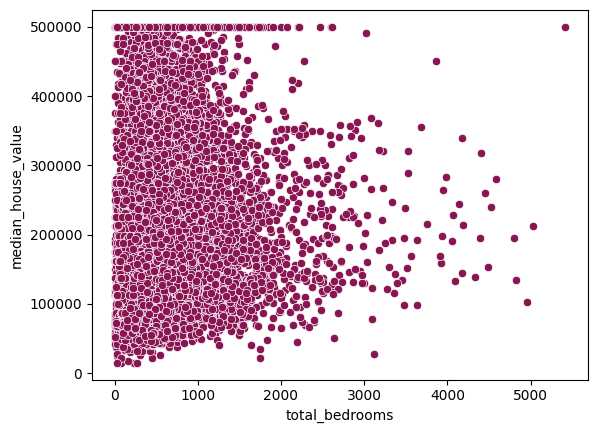

In [25]:
# scatterplot for the '"total_bedrooms"' with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="total_bedrooms",data=df_copy,color='#891652')

In [26]:
#based on the scatter plot, we can remove values higher than 5000 in the total_bedrooms column as outliers. 
df_copy = df_copy[df_copy["total_bedrooms"]<=5000]

# population

<Axes: xlabel='population', ylabel='median_house_value'>

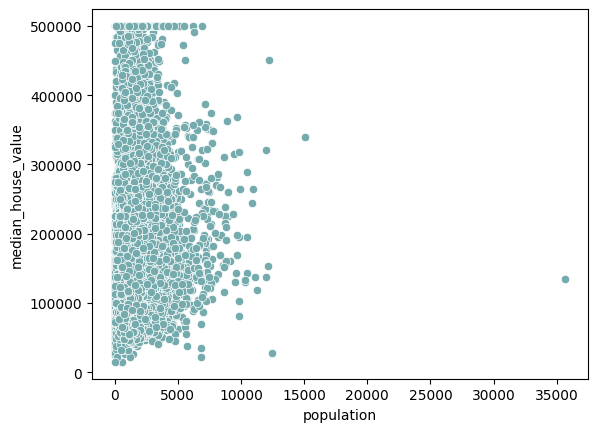

In [27]:
# scatterplot for the '"population"' with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value', x='population', data=df_copy, color='#76ABAE')

In [28]:
#based on the scatter plot, we can remove values higher than 10000 in the total_bedrooms column as outliers. 
df_copy = df_copy[df_copy["population"]<=10000]

# households

<Axes: xlabel='households', ylabel='median_house_value'>

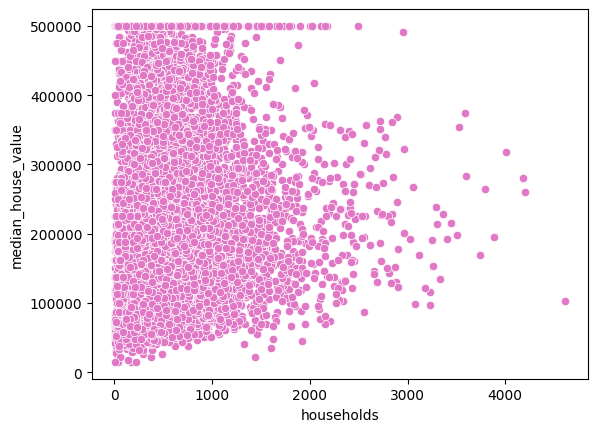

In [29]:
# scatterplot for the '"households"' with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y="median_house_value", x="households",data=df_copy, color='#E178C5')

In [30]:
#based on the scatter plot, we can remove values higher than 4000 in the total_bedrooms column as outliers. 
df_copy = df_copy[df_copy['households']<=4000]

# median_income

<Axes: xlabel='median_income', ylabel='median_house_value'>

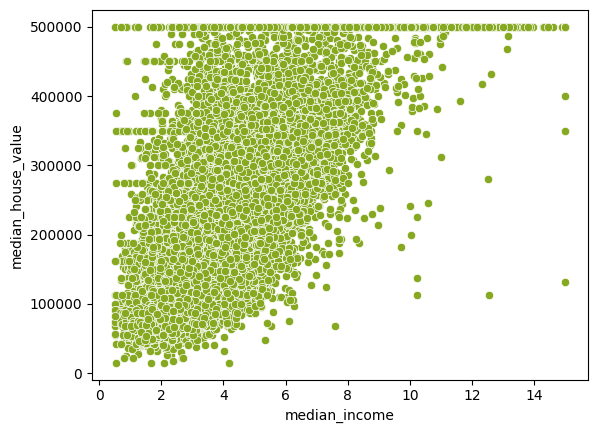

In [31]:
# scatterplot for the '"households"' with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y="median_house_value", x="median_income",data=df_copy, color='#87A922')

In [32]:
#based on the scatter plot, we can remove values higher than 10 in the total_bedrooms column as outliers. 
df_copy = df_copy[df_copy['median_income']<=10]

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20303 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20303 non-null  float64
 1   latitude            20303 non-null  float64
 2   housing_median_age  20303 non-null  float64
 3   total_rooms         20303 non-null  float64
 4   total_bedrooms      20303 non-null  float64
 5   population          20303 non-null  float64
 6   households          20303 non-null  float64
 7   median_income       20303 non-null  float64
 8   median_house_value  20303 non-null  float64
 9   ocean_proximity     20303 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [34]:
#check how much we lose i our data
sum_deliting_outliers = np.product(df_copy.shape)
sum_original_data = np.product(housing_df.shape)
percent_losing_data = round(100*(sum_original_data-sum_deliting_outliers)/sum_original_data,2)
print(f'the percentage of losing data is: {percent_losing_data}%')

the percentage of losing data is: 1.63%


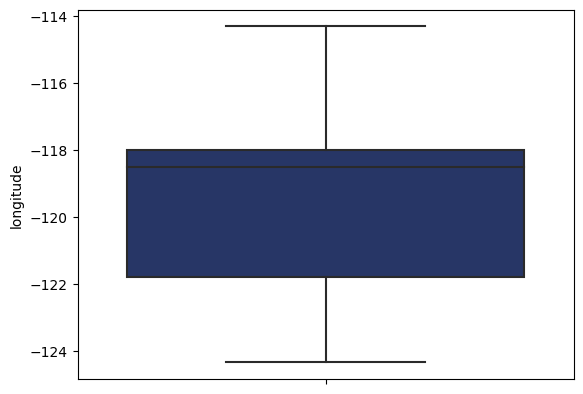

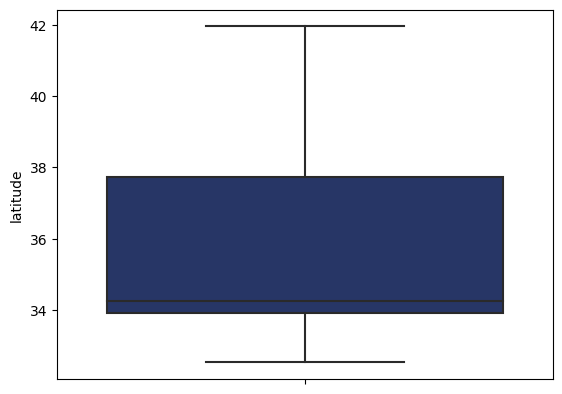

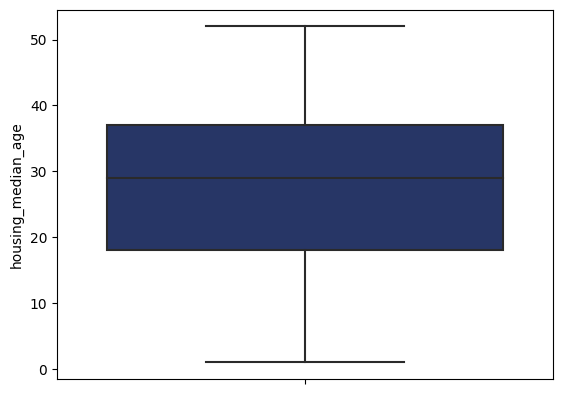

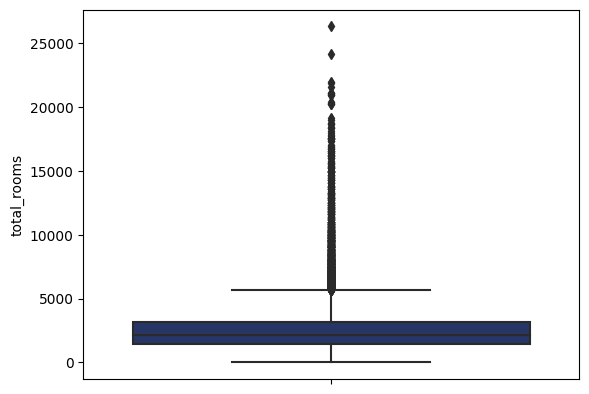

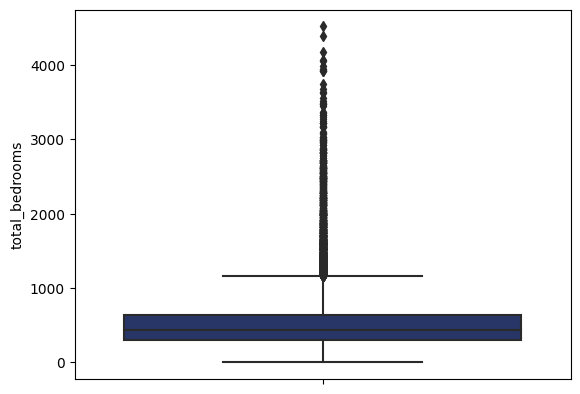

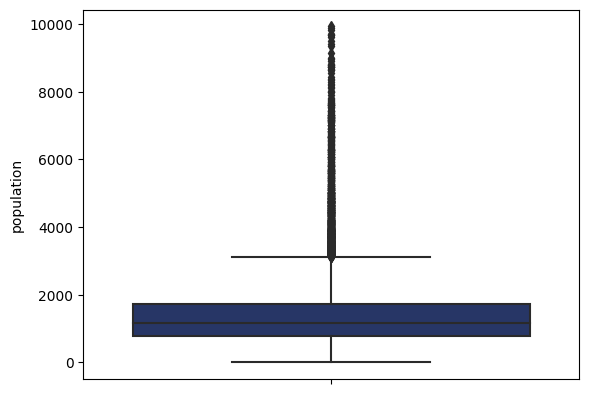

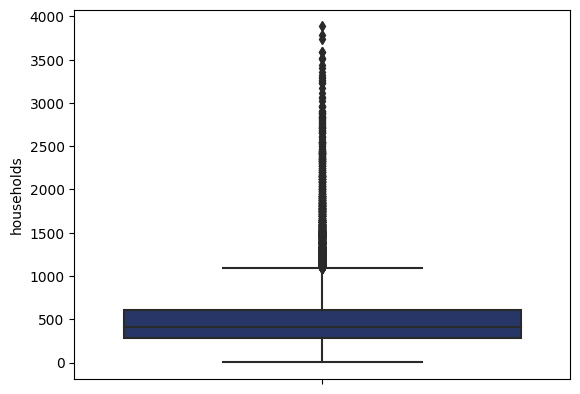

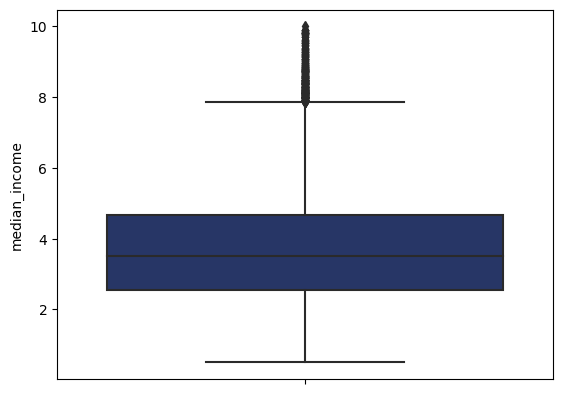

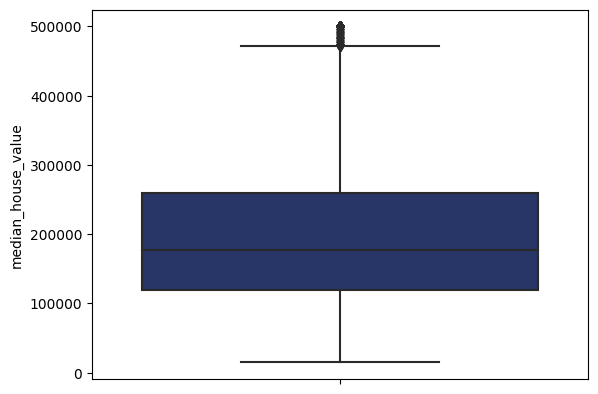

In [35]:
# Boxplot for the all the columns to check the outliers again
columns_l = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
for j in columns_l:
  sns.boxplot(y=j,data=df_copy,color='#1D3070')
  plt.show()

It seems that the third method for handling outliers did not effectively reduce the number of outliers as expected. Therefore, we will revert to the first method, which involves directly removing outliers from the dataset.

# We will proceed with the dataset after applying the outlier removal process using the method mentioned in "Method 1".


In [36]:
#copy the data from the method 1 adn display the size
new_df = delet_outliers
new_df.shape

(19746, 10)

# Now transform categorial features to numerical

In [37]:
new_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8705
INLAND        6302
NEAR OCEAN    2538
NEAR BAY      2196
ISLAND           5
Name: count, dtype: int64

In [38]:
#now lets code the ocean_proximity column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_df.loc[:, 'ocean_proximity'] = encoder.fit_transform(new_df['ocean_proximity'])
new_df['ocean_proximity'].value_counts()

ocean_proximity
0    8705
1    6302
4    2538
3    2196
2       5
Name: count, dtype: int64

# # # Machin Learning Part

In [39]:
#spliting the data
x = new_df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']]
y = new_df["median_house_value"].values

#train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.35, random_state= 45)

**Data Scalling**

In [40]:
from sklearn.preprocessing import RobustScaler
Scaler = RobustScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.fit_transform(x_test)

# ****Linear regression

In [41]:
#import Libraries:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [42]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)

In [43]:
#checke the perfermance of aour algorithme by MSE and R-squared
mse = mean_squared_error(y_test,y_pred)
r = metrics.r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test , y_pred)
print("MSE: ",mse )
print("R squared: ",r)
print("MAE: ",mae)

MSE:  4432453490.465184
R squared:  0.640937866950261
MAE:  49596.98055331721


In [44]:
#See the comparison between actual value and predicted
test_pred = pd.DataFrame({"y_test":y_test, "y_pred": y_pred})
test_pred.head()

,y_test,y_pred
0,360900.0,370180.198531
1,106800.0,141178.830131
2,500001.0,398546.939268
3,326000.0,293163.521143
4,165000.0,198216.670761


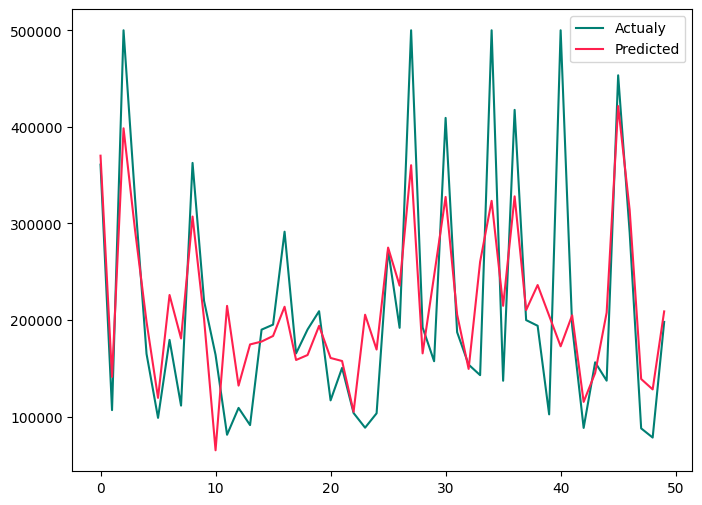

In [45]:
#plot the model
plt.figure(figsize=(8, 6))
plt.plot(test_pred[:50]['y_test'], color='#007F73')
plt.plot(test_pred[:50]['y_pred'], color='#FF204E')
plt.legend(["Actualy", "Predicted"])

plt.show()

# ****Polynomial model

In [46]:
#Importing libraries
from sklearn.preprocessing import PolynomialFeatures

In [47]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
y_predicted = lg.predict(x_test_)

In [48]:
#testing our model’s performance
mae = mean_absolute_error(y_test , y_predicted)
print('MAE: ',mae)
print("MSE: ", metrics.mean_squared_error(y_test, y_predicted))
print("R squared: ", metrics.r2_score(y_test,y_predicted))

MAE:  40527.996501511676
MSE:  3385232055.859116
R squared:  0.7257706943885924


In [49]:
#See the comparison between actual value and predicted
test_pred2 = pd.DataFrame({"y_test":y_test, "y_pred": y_predicted})
test_pred2.head()

,y_test,y_pred
0,360900.0,340863.918965
1,106800.0,120309.060210
2,500001.0,468190.989759
3,326000.0,280358.979834
4,165000.0,184675.090358


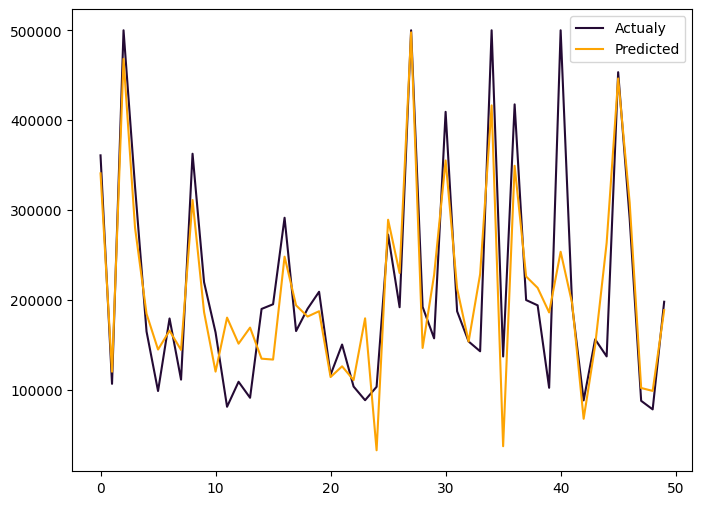

In [50]:
#plot the model
plt.figure(figsize=(8, 6))
plt.plot(test_pred2[:50]['y_test'], color='#240A34')
plt.plot(test_pred2[:50]['y_pred'], color='#FDA403')
plt.legend(["Actualy", "Predicted"])

plt.show()

The polynomial model demonstrates superior performance compared to the regression model in terms of predictive accuracy and ability to explain variance in the target variable. It achieves lower error metrics, including Mean Absolute Error (MAE) and Mean Squared Error (MSE), indicating more accurate predictions. Additionally, the polynomial model achieves a higher R-squared value, suggesting that it captures a larger proportion of the underlying patterns in the data. Therefore, it is recommended to prioritize the polynomial model for further analysis and potential deployment, with the caveat of conducting thorough validation and testing to ensure its robustness and generalizability across different datasets and scenarios.